In [4]:
from utilities import input_tools,boostHistHelpers as hh
from wremnants import plot_tools,theory_tools
import lz4.frame,pickle
import hist
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/06


2023-03-03 13:47:10.391927: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 13:47:10.763104: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /.singularity.d/libs
2023-03-03 13:47:10.763137: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-03 13:47:10.792524: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-03 13:47:11.628585: W

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
minnlo_wm = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "WminusmunuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)

In [7]:
minnlo_wp = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "WplusmunuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)

In [8]:
minnlo_z = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "ZmumuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)

In [9]:
dyturbo_dir = "/scratch/shared/TheoryPredictions/DYTurbo"

In [10]:
mcfm_n4ll_wm = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/MCFM/wplus_n4ll/W_only_resonlyN3LO_MSHT20nnlo_as118_1.00_1.00_13TeV_pt34.txt"], axes=["pt"])

In [11]:
mcfm_n3ll_wm = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/MCFM/wplus_n3ll/W_only_resonlyNNLO_MSHT20nnlo_as118_1.00_1.00_13TeV_pt34.txt"], axes=["ptll"])

In [12]:
scetlib_n3ll_wm = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wm_MSHT20_tnp_combined.pkl", nonsing="")


In [13]:
dyturbo_n4ll_msht20nnlo_g0p8_wm = input_tools.read_dyturbo_hist([f"{dyturbo_dir}/variationruns/wm-13tev-cms-wmass-nnlon4ll-mur1-muf1-mures1-msht20nnlo-g0p8.txt"], axes=["qT"])

In [14]:
dyturbo_n3ll_msht20nnlo_g0p8_wm = input_tools.read_dyturbo_hist([f"{dyturbo_dir}/variationruns/wm-13tev-cms-wmass-nnlon3ll-mur1-muf1-mures1-msht20nnlo-g0p8.txt"], axes=["qT"])

In [15]:
minnlo_wm_pt, mcfm_n4ll_wm, mcfm_n3ll_wm, dyturbo_n4ll_msht20nnlo_g0p8_wm, dyturbo_n3ll_msht20nnlo_g0p8_wm, scetlib_n3ll_wm_pt = hh.rebinHistsToCommon([minnlo_wm.project("ptVgen"), mcfm_n4ll_wm, mcfm_n3ll_wm, dyturbo_n4ll_msht20nnlo_g0p8_wm, dyturbo_n3ll_msht20nnlo_g0p8_wm, scetlib_n3ll_wm[{"vars" : 0}].project("qT")], 0)


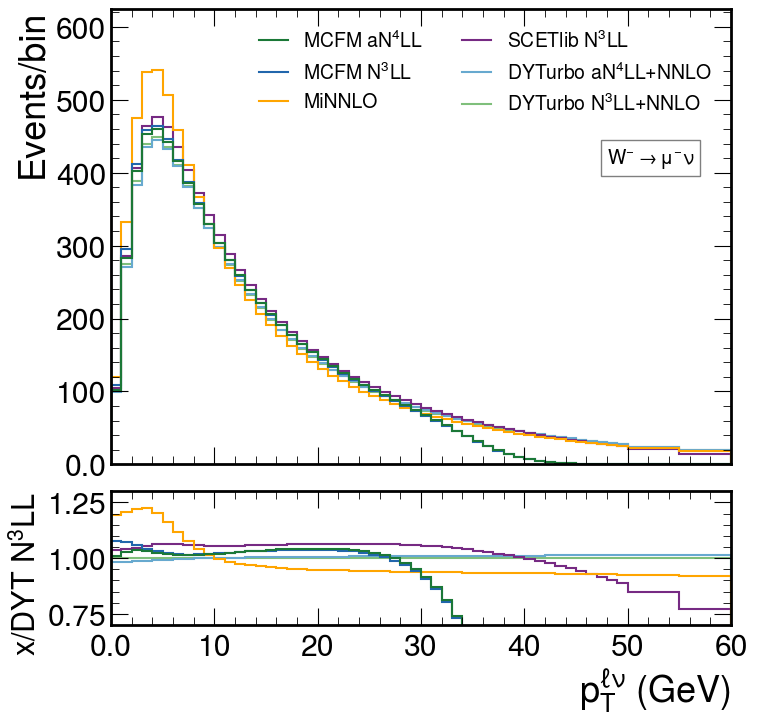

In [16]:
fig = plot_tools.makePlotWithRatioToRef(
            [dyturbo_n3ll_msht20nnlo_g0p8_wm,
                 dyturbo_n4ll_msht20nnlo_g0p8_wm,
                 scetlib_n3ll_wm_pt,
                 minnlo_wm_pt,
                 mcfm_n3ll_wm,
                 mcfm_n4ll_wm,
            ],
            ["DYTurbo N$^{3}$LL+NNLO", "DYTurbo aN$^{4}$LL+NNLO", "SCETlib N$^{3}$LL", "MiNNLO", "MCFM N$^{3}$LL", "MCFM aN$^{4}$LL"], 
            colors=["#7fbf7b", "#67a9cf", "#762a83", "orange", "#2166ac", "#1b7837"], 
            xlabel=r"p$_{T}^{\ell\nu}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/DYT N$^{3}$LL",
            rrange=[0.7, 1.3],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True, extra_text=r"W$^{-}\rightarrow\mu^{-}\nu$")

In [17]:
mcfm_n4ll_z = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/MCFM/z_n4ll/Z_only_resonlyN3LO_MSHT20nnlo_as118_1.00_1.00_13TeV_pt34.txt"], axes=["pt"])

In [18]:
mcfm_n3ll_z = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/MCFM/z_n3ll/Z_only_resonlyNNLO_MSHT20nnlo_as118_1.00_1.00_13TeV_pt34.txt"], axes=["pt"])

In [19]:
scetlib_n3ll_z = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20.pkl")

In [20]:
scetlib_n3ll_nnlo_z = input_tools.read_matched_scetlib_dyturbo_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20.pkl",
                                                   "/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20_nnlo_sing.pkl",
                                                    "/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_z-2d-vj-nnlo-scetlibmatch.txt",
                                                    axes=("Y", "qT"))

In [21]:
scetlib_n4ll_z = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/production/Z/inclusive_Z_MSHT20an3lo_N4LL.pkl", nonsing="")

In [22]:
dyturbo_n4ll_msht20nnlo_g0p8_z = input_tools.read_dyturbo_hist([f"{dyturbo_dir}/variationruns/z-13tev-cms-wmass-nnlon4ll-mur1-muf1-mures1-msht20nnlo-g0p8.txt"], axes=["ptll"])

In [23]:
dyturbo_n3ll_msht20nnlo_g0p8_z = input_tools.read_dyturbo_hist([f"{dyturbo_dir}/variationruns/z-13tev-cms-wmass-nnlon3ll-mur1-muf1-mures1-msht20nnlo-g0p8.txt"], axes=["ptll"])


In [24]:
dyturbo_n4ll_msht20nnlo_g0p8_z.values().shape

(84,)

In [25]:
minnlo_z_pt, mcfm_n4ll_z, mcfm_n3ll_z, dyturbo_n4ll_msht20nnlo_g0p8_z, dyturbo_n3ll_msht20nnlo_g0p8_z, scetlib_n3ll_pt_z, scetlib_n4ll_pt_z, scetlib_n3ll_nnlo_pt_z = hh.rebinHistsToCommon([minnlo_z.project("ptVgen"), mcfm_n4ll_z, mcfm_n3ll_z, dyturbo_n4ll_msht20nnlo_g0p8_z, dyturbo_n3ll_msht20nnlo_g0p8_z, scetlib_n3ll_z[{"vars" : 0}].project("qT"), scetlib_n4ll_z[{"vars" : 0}].project("qT"), scetlib_n3ll_nnlo_z[{"vars" : "central"}].project("qT")], 0)



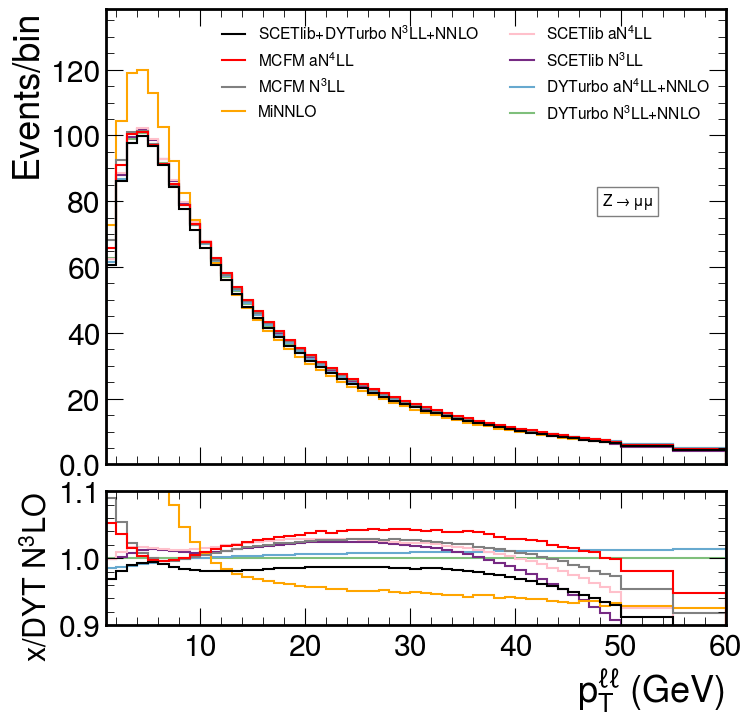

In [65]:
fig = plot_tools.makePlotWithRatioToRef(
            [dyturbo_n3ll_msht20nnlo_g0p8_z,
                 dyturbo_n4ll_msht20nnlo_g0p8_z,
                 scetlib_n3ll_pt_z,
                 scetlib_n4ll_pt_z,
                 minnlo_z_pt,
                 mcfm_n3ll_z,
                 mcfm_n4ll_z,
                 scetlib_n3ll_nnlo_pt_z,
            ],
            ["DYTurbo N$^{3}$LL+NNLO", "DYTurbo aN$^{4}$LL+NNLO", "SCETlib N$^{3}$LL", "SCETlib aN$^{4}$LL", 
             "MiNNLO", "MCFM N$^{3}$LL", "MCFM aN$^{4}$LL", "SCETlib+DYTurbo N$^{3}$LL+NNLO"], 
            colors=["#7fbf7b", "#67a9cf", "#762a83", "pink", "orange", "grey", "red", "black"], 
            xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/DYT N$^{3}$LO",
            rrange=[0.9, 1.1],
            yscale=1.1,
            legtext_size=16,
            xlim=None, binwnorm=1.0, baseline=True, 
            extra_text=r"Z$\rightarrow\mu\mu$", extra_text_loc=(0.8, 0.6))

In [27]:
mcfm_n4ll_wp = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/MCFM/wminus_n4ll/W_only_resonlyN3LO_MSHT20nnlo_as118_1.00_1.00_13TeV_pt34.txt"], axes=["pt"])

In [28]:
mcfm_n3ll_wp = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/MCFM/wminus_n3ll/W_only_resonlyNNLO_MSHT20nnlo_as118_1.00_1.00_13TeV_pt34.txt"], axes=["ptll"])

In [29]:
scetlib_n3ll_wp = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wp_MSHT20_tnp_combined.pkl", nonsing="")

In [30]:
scetlib_n3ll_nnlo_wp = input_tools.read_matched_scetlib_dyturbo_hist(
    "/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wp_MSHT20_tnp_combined.pkl",
    "/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wp_MSHT20_tnp_nnlo_sing.pkl",
    "/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_wp-2d-nnlo-vj-scetlibmatch.txt",
    axes=["Y", "qT",],
)

In [31]:
dyturbo_n4ll_msht20nnlo_g0p8_wp = input_tools.read_dyturbo_hist([f"{dyturbo_dir}/variationruns/wp-13tev-cms-wmass-nnlon4ll-mur1-muf1-mures1-msht20nnlo-g0p8.txt"], axes=["qT"])

In [32]:
dyturbo_n3ll_msht20nnlo_g0p8_wp = input_tools.read_dyturbo_hist([f"{dyturbo_dir}/variationruns/wp-13tev-cms-wmass-nnlon3ll-mur1-muf1-mures1-msht20nnlo-g0p8.txt"], axes=["qT"])

In [33]:
minnlo_wp_pt, mcfm_n4ll_wp, mcfm_n3ll_wp, dyturbo_n4ll_msht20nnlo_g0p8_wp, dyturbo_n3ll_msht20nnlo_g0p8_wp, scetlib_n3ll_pt_wp, scetlib_n3ll_nnlo_pt_wp = hh.rebinHistsToCommon([minnlo_wp.project("ptVgen"), mcfm_n4ll_wp, mcfm_n3ll_wp, dyturbo_n4ll_msht20nnlo_g0p8_wp, dyturbo_n3ll_msht20nnlo_g0p8_wp, scetlib_n3ll_wp[{"vars" : 0}].project("qT"), scetlib_n3ll_nnlo_wp[{"vars" : "central"}].project("qT")], 0)


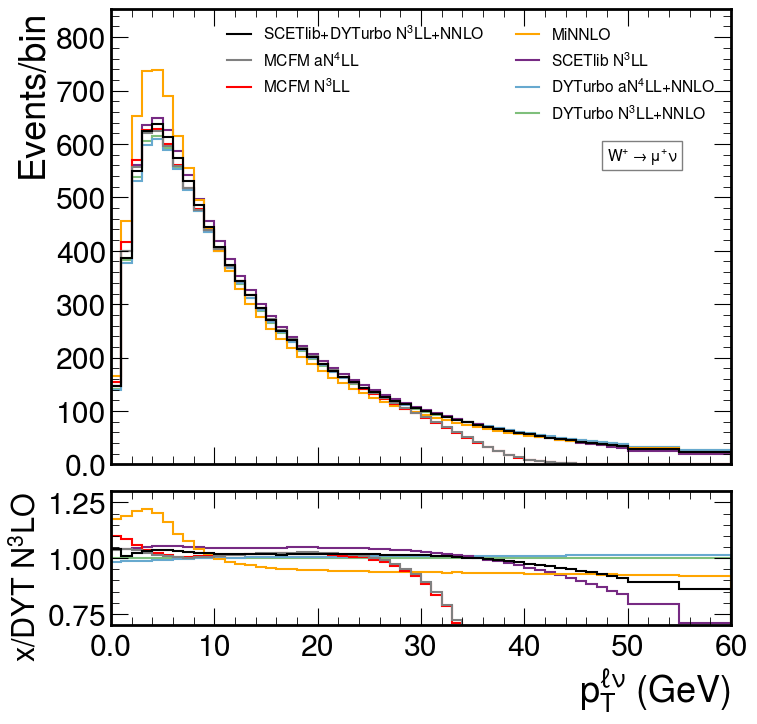

In [34]:
fig = plot_tools.makePlotWithRatioToRef(
            [dyturbo_n3ll_msht20nnlo_g0p8_wp,
                 dyturbo_n4ll_msht20nnlo_g0p8_wp,
                 scetlib_n3ll_pt_wp,
                 minnlo_wp_pt,
                 mcfm_n3ll_wp,
                 mcfm_n4ll_wp,
                 scetlib_n3ll_nnlo_pt_wp,
            ],
            ["DYTurbo N$^{3}$LL+NNLO", "DYTurbo aN$^{4}$LL+NNLO", "SCETlib N$^{3}$LL", "MiNNLO", 
             "MCFM N$^{3}$LL", "MCFM aN$^{4}$LL", "SCETlib+DYTurbo N$^{3}$LL+NNLO"], 
            colors=["#7fbf7b", "#67a9cf", "#762a83", "orange", "red", "grey", "black"], 
            xlabel=r"p$_{T}^{\ell\nu}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/DYT N$^{3}$LO",
            rrange=[0.7, 1.3],
            legtext_size=16,
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True, extra_text=r"W$^{+}\rightarrow\mu^{+}\nu$")

In [35]:
mcfm_n4ll_wpwm_ratio = hh.divideHists(mcfm_n4ll_wp, mcfm_n4ll_wm)

In [36]:
mcfm_n3ll_wpwm_ratio = hh.divideHists(mcfm_n3ll_wp, mcfm_n3ll_wm)

In [37]:
dyturbo_n3ll_msht20nnlo_g0p8_wpwm_ratio = hh.divideHists(dyturbo_n3ll_msht20nnlo_g0p8_wp, dyturbo_n3ll_msht20nnlo_g0p8_wm)

In [38]:
dyturbo_n4ll_msht20nnlo_g0p8_wpwm_ratio = hh.divideHists(dyturbo_n4ll_msht20nnlo_g0p8_wp, dyturbo_n4ll_msht20nnlo_g0p8_wm)

In [39]:
scetlib_n3ll_pt_wpwm_ratio = hh.divideHists(scetlib_n3ll_pt_wp, scetlib_n3ll_wm_pt)

In [40]:
minnlo_wpwm_pt_ratio = hh.divideHists(minnlo_wp_pt, minnlo_wm_pt)

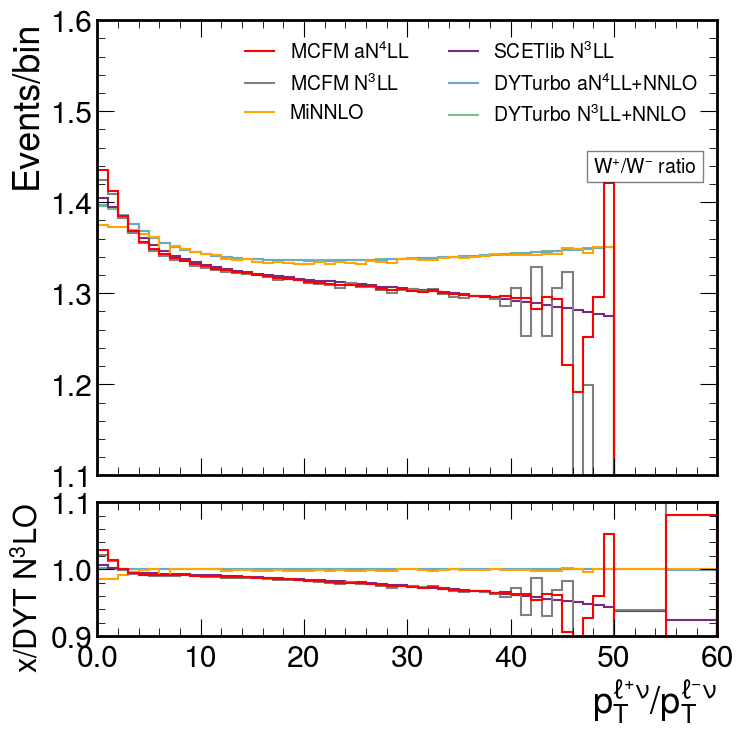

In [67]:
fig = plot_tools.makePlotWithRatioToRef(
            [dyturbo_n3ll_msht20nnlo_g0p8_wpwm_ratio,
                 dyturbo_n4ll_msht20nnlo_g0p8_wpwm_ratio,
                 scetlib_n3ll_pt_wpwm_ratio,
                 minnlo_wpwm_pt_ratio,
                 mcfm_n3ll_wpwm_ratio,
                 mcfm_n4ll_wpwm_ratio,
            ],
            ["DYTurbo N$^{3}$LL+NNLO", "DYTurbo aN$^{4}$LL+NNLO", "SCETlib N$^{3}$LL", "MiNNLO", "MCFM N$^{3}$LL", "MCFM aN$^{4}$LL"], 
            colors=["#7fbf7b", "#67a9cf", "#762a83", "orange", "grey", "red"], 
            xlabel=r"p$_{T}^{\ell^{+}\nu}/$p$_{T}^{\ell^{-}\nu}$", 
            ylabel="Events/bin",
            rlabel="x/DYT N$^{3}$LO",
            rrange=[0.9, 1.1],
            ylim=[1.1, 1.6],
            xlim=None, binwnorm=1.0, baseline=True, extra_text=r"W$^{+}/W^{-}$ ratio")

In [42]:
mcfm_n4ll_wpz_ratio = hh.divideHists(mcfm_n4ll_wp[1:], mcfm_n4ll_z)

In [43]:
mcfm_n3ll_wpz_ratio = hh.divideHists(mcfm_n3ll_wp[1:], mcfm_n3ll_z)

In [44]:
dyturbo_n3ll_msht20nnlo_g0p8_wpz_ratio = hh.divideHists(dyturbo_n3ll_msht20nnlo_g0p8_wp[1:], dyturbo_n3ll_msht20nnlo_g0p8_z)

In [45]:
dyturbo_n4ll_msht20nnlo_g0p8_wpz_ratio = hh.divideHists(dyturbo_n4ll_msht20nnlo_g0p8_wp[1:], dyturbo_n4ll_msht20nnlo_g0p8_z)

In [46]:
scetlib_n3ll_pt_wpz_ratio = hh.divideHists(scetlib_n3ll_pt_wp[1:], scetlib_n3ll_pt_z)

In [47]:
minnlo_wpz_pt_ratio = hh.divideHists(scetlib_n3ll_nnlo_pt_wp[1:], scetlib_n3ll_nnlo_pt_z)

In [48]:
scetlib_n3ll_nnlo_wpz_pt_ratio = hh.divideHists(minnlo_wp_pt[1:], minnlo_z_pt)

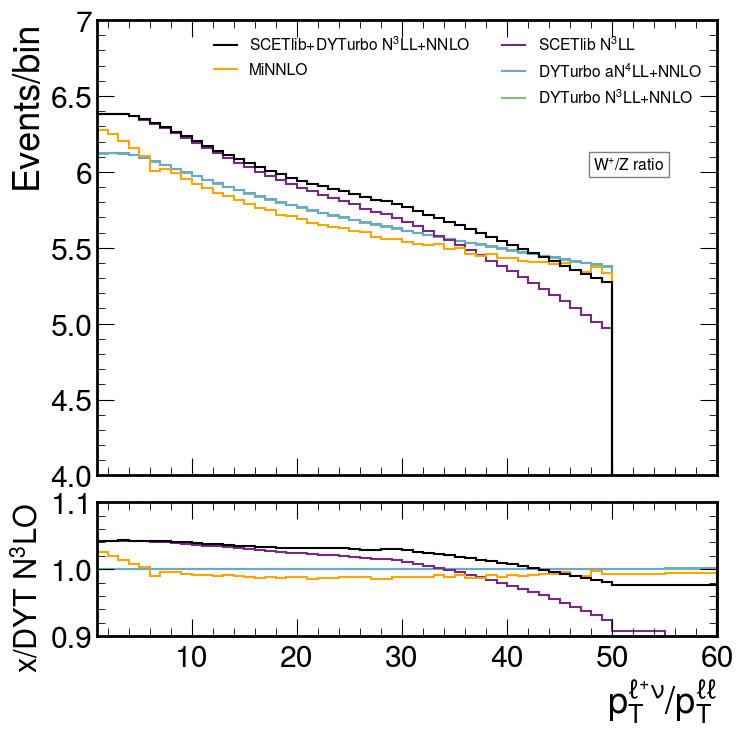

In [70]:
fig = plot_tools.makePlotWithRatioToRef(
            [dyturbo_n3ll_msht20nnlo_g0p8_wpz_ratio,
                 dyturbo_n4ll_msht20nnlo_g0p8_wpz_ratio,
                 scetlib_n3ll_pt_wpz_ratio,
                 scetlib_n3ll_nnlo_wpz_pt_ratio,
                 minnlo_wpz_pt_ratio,
            ],
            ["DYTurbo N$^{3}$LL+NNLO", "DYTurbo aN$^{4}$LL+NNLO", "SCETlib N$^{3}$LL", "MiNNLO", 
             "SCETlib+DYTurbo N$^{3}$LL+NNLO"], 
            colors=["#7fbf7b", "#67a9cf", "#762a83", "orange", "black"], 
            xlabel=r"p$_{T}^{\ell^{+}\nu}/$p$_{T}^{\ell\ell}$", 
            legtext_size=16,
            ylabel="Events/bin",
            rlabel="x/DYT N$^{3}$LO",
            rrange=[0.9, 1.1],
            ylim=[4, 7],
            xlim=None, binwnorm=1.0, baseline=True, extra_text=r"W$^{+}/Z$ ratio")

In [50]:
mcfm_n4ll_wmz_ratio = hh.divideHists(mcfm_n4ll_wm[1:], mcfm_n4ll_z)

In [51]:
mcfm_n3ll_wmz_ratio = hh.divideHists(mcfm_n3ll_wm[1:], mcfm_n3ll_z)

In [52]:
dyturbo_n3ll_msht20nnlo_g0p8_wmz_ratio = hh.divideHists(dyturbo_n3ll_msht20nnlo_g0p8_wm[1:], dyturbo_n3ll_msht20nnlo_g0p8_z)

In [53]:
dyturbo_n4ll_msht20nnlo_g0p8_wmz_ratio = hh.divideHists(dyturbo_n4ll_msht20nnlo_g0p8_wm[1:], dyturbo_n4ll_msht20nnlo_g0p8_z)

In [54]:
scetlib_n3ll_pt_wmz_ratio = hh.divideHists(scetlib_n3ll_wm_pt[1:], scetlib_n3ll_pt_z)

In [55]:
minnlo_wmz_pt_ratio = hh.divideHists(minnlo_wm_pt[1:], minnlo_z_pt)

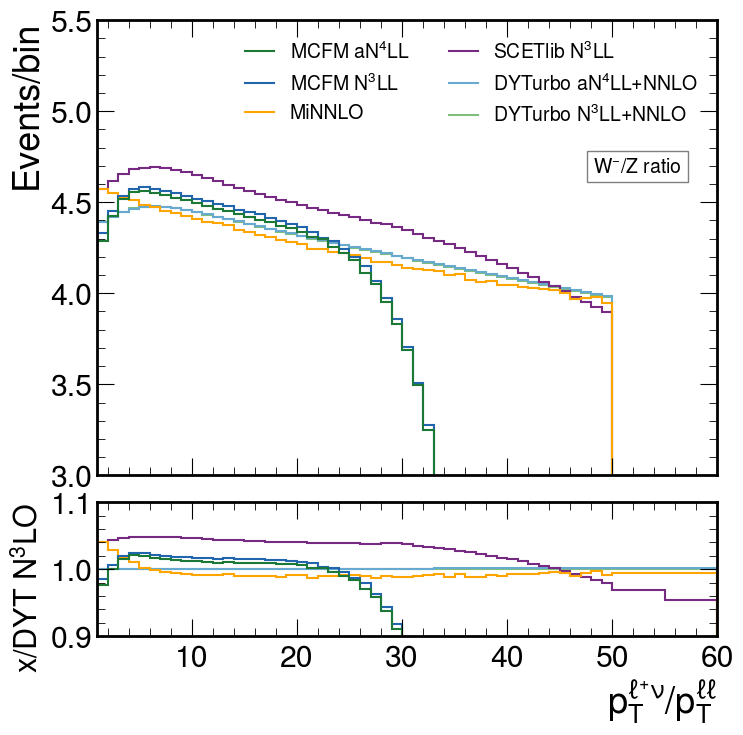

In [71]:
fig = plot_tools.makePlotWithRatioToRef(
            [dyturbo_n3ll_msht20nnlo_g0p8_wmz_ratio,
                 dyturbo_n4ll_msht20nnlo_g0p8_wmz_ratio,
                 scetlib_n3ll_pt_wmz_ratio,
                 minnlo_wmz_pt_ratio,
                 mcfm_n3ll_wmz_ratio,
                 mcfm_n4ll_wmz_ratio,
            ],
            ["DYTurbo N$^{3}$LL+NNLO", "DYTurbo aN$^{4}$LL+NNLO", "SCETlib N$^{3}$LL", "MiNNLO", "MCFM N$^{3}$LL", "MCFM aN$^{4}$LL"], 
            colors=["#7fbf7b", "#67a9cf", "#762a83", "orange", "#2166ac", "#1b7837"], 
            xlabel=r"p$_{T}^{\ell^{+}\nu}/$p$_{T}^{\ell\ell}$", 
            ylabel="Events/bin",
            rlabel="x/DYT N$^{3}$LO",
            rrange=[0.9, 1.1],
            ylim=[3, 5.5],
            xlim=None, binwnorm=1.0, baseline=True, extra_text=r"W$^{-}/Z$ ratio")

In [57]:
scetlib_np = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Z_vars/inclusive_Z_MSHT20_N4LL_NP.pkl", nonsing="")

In [58]:
import numpy as np

In [59]:
scetlib_n4ll = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles//inclusive_Z_MSHT20_N4LL_NP.pkl", nonsing="")

In [60]:
type(scetlib_n4ll) == hist.Hist

True

In [61]:
scetlib_n3ll = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Z_vars/inclusive_Z_MSHT20.pkl")


In [62]:
scetlib_n3ll.axes

(Regular(5, 60, 120, name='Q'),
 Regular(10, -5, 5, name='Y'),
 Regular(40, 0, 40, name='qT'),
 StrCategory(['central', 'kappaFO0.5', 'kappaFO2.', 'lambda0.8', 'lambda1.5', 'transition_points[0.4', 'transition_points[0.2', 'transition_points[0.4', 'transition_points[0.2', 'muBup', 'nuBup', 'muSup', 'nuSup', 'nuSdown', 'muSdown', 'nuBdown', 'muBdown', 'muBup-nuBup', 'muBup-muSup', 'muBup-nuSup', 'muBup-nuSdown', 'muBup-nuBdown', 'nuBup-muSup', 'nuBup-nuSup', 'nuBup-muSdown', 'muSup-nuSup', 'muSdown-nuSdown', 'nuBdown-muSup', 'nuBdown-nuSdown', 'nuBdown-muSdown', 'muBdown-nuSup', 'muBdown-muSdown', 'muBdown-nuBdown', 'muBup-nuBup-muSup', 'muBup-nuBup-nuSup', 'muBup-muSup-nuSup', 'muBup-nuBdown-muSup', 'muBup-nuBdown-nuSdown', 'nuBup-muSup-nuSup', 'nuBdown-muSdown-nuSdown', 'muBdown-nuBup-nuSup', 'muBdown-nuBdown-nuSdown', 'muBdown-nuBdown-muSdown', 'muBup-nuBup-muSup-nuSup', 'muBdown-nuBdown-muSdown-nuSdown'], name='vars'))

In [63]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlib_n3ll[{"vars" : i}].project("qT") for i in scetlib_n3ll.axes["vars"]
            ]+[x.project("qT") for x in theory_tools.hessianPdfUnc(scetlib_n3ll, "vars", "asymm")]
                +2*[scetlib_n4ll[{"vars" : 0}].project("pt")],
            [i.replace("up", "") if ("up" in i or "central" in i) else "" for i in scetlib_n3ll.axes["vars"]]+
                ["total $\pm 1 \sigma$", "", "N$^{4}$LL", ""], 
            colors=["purple",]+
                    ["#67a9cf", "#67a9cf",
                    "#7fbf7b", "#7fbf7b",
                    "#762a83", "#762a83", 
                    "pink", "pink",
                    "red", "red",
                    "green", "green",
                    "orange", "orange",
                    "brown","brown",
                    "forestgreen", "forestgreen",
                    "brown", "brown",
                    "grey","grey",
                    "blue", "blue",
                   ]*2, 
            xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/cen.",
            rrange=[0.9, 1.1],
            yscale=1.1,
            legtext_size=14,
            xlim=None, binwnorm=1.0, baseline=True, 
            fill_between=True,
)

/opt/venv/lib/python3.10/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


ValueError: The axis name pt could not be found

In [ ]:
import hist

In [ ]:
[i for j in [[x+"Up", x+"Down"] for x in ["gamma_cusp", "gamma_mu_q", "gamma_nu", "h_qqV", "s", "b_qqV", "b_qqbarV",]] for i in j]

In [ ]:
cat_ax = hist.axis.StrCategory(["central"] + [i for j in [[x+"Up", x+"Down"] for x in ["gamma_cusp", "gamma_mu_q", "gamma_nu", "h_qqV", "s", "b_qqV", "b_qqbarV", "b_qqS", "b_qqDS", "b_qgUp"]] for i in j], name="vars")

In [ ]:
cat_ax.size

In [ ]:
scetlib_n3ll_np_cat = hist.Hist(*axes[:-1], cat_ax, storage=hist.storage.Weight())

In [ ]:
scetlib_n4ll_np_cat = hist.Hist(*scetlib_n4ll.axes[:-1], cat_ax, storage=hist.storage.Weight())

In [ ]:
scetlib_n3ll_np_cat[...] = scetlib_np.view(flow=True)

In [ ]:
scetlib_n4ll_np_cat[...] = scetlib_n4ll.view(flow=True)

In [ ]:
scetlib_n4ll[{"vars" : 0}].project("pt").values()

In [ ]:
scetlib_n3ll[{"vars" : 0}].project("pt").values()

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlib_n4ll_np_cat[{"vars" : i}].project("pt") for i in cat_ax
            ]+[x.project("pt") for x in theory_tools.hessianPdfUnc(scetlib_n4ll_np_cat, "vars", "asymm")]
                +2*[scetlib_n3ll[{"vars" : 0}].project("pt")],
            [names[0]]+[i for j in [[label+"$\pm 1\sigma$", ""] for label in names[1:]] for i in j]+
                ["total $\pm 1 \sigma$", "", "N$^{3}$LL", ""], 
            colors=["purple",
                    "#67a9cf", "#67a9cf",
                    "#7fbf7b", "#7fbf7b",
                    "#762a83", "#762a83", 
                    "pink", "pink",
                    "red", "red",
                    "green", "green",
                    "orange", "orange",
                    "brown","brown",
                    "forestgreen", "forestgreen",
                    "brown", "brown",
                    "grey","grey",
                    "blue", "blue"
                   ], 
            xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/cen.",
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True, 
            fill_between=True,
)

In [ ]:
/scratch/kelong/Analysis/MuonCorrCompare/mz_wlike_with_mu_eta_pt_scetlibCorr_massfit_lbl_dilepton.pkl.lz4
/scratch/kelong/Analysis/MuonCorrCompare/mz_wlike_with_mu_eta_pt_scetlibNPCorr_massfit_lbl_dilepton.pkl.lz4

In [ ]:
with lz4.frame.open("/scratch/kelong/Analysis/MuonCorrCompare/mz_wlike_with_mu_eta_pt_scetlibNPCorr_massfit_lbl_dilepton.pkl.lz4") as f:
    res = pickle.load(f)

In [ ]:
nominal = res["ZmumuPostVFP"]["output"]["dilepton_scetlibNPCorr_unc"]

In [ ]:
nominal

In [ ]:
len([l.replace("up","") if (l == "central" or "up" in l) else "" for l in nominal.axes[-1]])

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                nominal[{"vars" : i}].project("pt") for i in nominal.axes[-1]
            ]+[x.project("pt") for x in theory_tools.hessianPdfUnc(nominal, "vars", "asymm")],
            labels=[l.replace("up","") if (l == "central" or "up" in l) else "" for l in nominal.axes[-1]]
                +["total unc.", ""],
            colors=["purple"]+[
                    "#67a9cf", "#67a9cf",
                    "#7fbf7b", "#7fbf7b",
                    "#762a83", "#762a83", 
                    "pink", "pink",
                    "red", "red",
                    "green", "green",
                    "orange", "orange",
                    "brown","brown",
                    "forestgreen", "forestgreen",
                    "brown", "brown",
                    "blue","blue",
                   ]*2+["grey", "grey"], 
            xlabel="p$_{T}^{\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/cen.",
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True, 
            fill_between=True,
)

In [ ]:
scetlib_n3ll

In [ ]:
def scetlib_scale_unc_hist(h, obs=["qT"]):
    hnew = hist.Hist(*h.axes[:-1], hist.axis.StrCategory([
        "central",
        "resumFOScaleUp", "resumFOScaleDown",
        "resumLambdaUp", "resumLambdaDown",
        "resumTransitionMax", "resumTransitionMin",
        "resumScaleMax", "resumScaleMin"
    ], name="vars"), storage=h._storage_type())
    
    hnew[...,"central"] = h[...,"central"].view(flow=True)
    hnew[...,"resumFOScaleUp"] = h[...,"kappaFO2."].view(flow=True)
    hnew[...,"resumFOScaleDown"] = h[...,"kappaFO0.5"].view(flow=True)
    hnew[...,"resumLambdaUp"] = h[...,"lambda0.8"].view(flow=True)
    hnew[...,"resumLambdaDown"] = h[...,"lambda1.5"].view(flow=True)
    
    transition_names = [x for x in h.axes["vars"] if "transition" in x]    
    hnew[...,"resumTransitionMax"] = hh.syst_min_or_max_env_hist(h, ["qT"], "vars", 
                                    h.axes["vars"].index(transition_names), do_min=False).view(flow=True)
    hnew[...,"resumTransitionMin"] = hh.syst_min_or_max_env_hist(h, ["qT"], "vars", 
                                    h.axes["vars"].index(transition_names), do_min=True).view(flow=True)
    
    resum_names = [x for x in h.axes["vars"] if not any(i in x for i in ["lambda", "kappa", "transition"])]
    hnew[...,"resumScaleMax"] = hh.syst_min_or_max_env_hist(h, ["qT"], "vars", 
                                    h.axes["vars"].index(resum_names), do_min=False).view(flow=True)
    hnew[...,"resumScaleMin"] = hh.syst_min_or_max_env_hist(h, ["qT"], "vars", 
                                    h.axes["vars"].index(resum_names), do_min=True).view(flow=True)
    return hnew

In [ ]:
scetlib_unc = scetlib_scale_unc_hist(scetlib_n3ll)

In [ ]:
to_plot = ['central', 'resumFOScaleUp', 'resumFOScaleDown', 'resumLambdaUp', 'resumLambdaDown', 'resumScaleMax', 'resumScaleMin']

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlib_unc[{"vars" : i}].project("qT") for i in to_plot
            ]+[x.project("qT") for x in theory_tools.hessianPdfUnc(scetlib_unc, "vars", "asymm")],
            labels=[l.replace("Up","").replace("Max", "") if any([y in l for y in ["central", "Up", "Max"]]) else "" for l in to_plot]
                +["total unc.", ""],
            colors=["purple"]+[
                    "#67a9cf", "#67a9cf",
                    "#7fbf7b", "#7fbf7b",
                    #"#762a83", "#762a83", 
                    "brown", "brown",
                   ]+["grey", "grey"], 
            xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/cen.",
            rrange=[0.85, 1.15],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True, 
            fill_between=True,
)

In [ ]:
names = [(x.replace("+1", "") if "+1" in x else "") if ("+1" in x or "-1" in x) else x for x in list(nominal.axes[-1])]

In [ ]:
names

In [ ]:
names[-2] = "$\Lambda_{resum}$"
names[-1] = ""
names[-4] = "$\kappa_{FO}$"
names[-3] = ""

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            [nominal[{"vars" : 0}].project("ptll")]+
            [x.project("ptll") for x in theory_tools.hessianPdfUnc(nominal, "vars", "asymm", False)]+
            list(reversed([
                nominal[{"vars" : i}].project("ptll") for i in nominal.axes[-1]
            ])),
            labels=[""]+
                ["total unc.", ""]+
                list(reversed(names)),
            colors=["purple"]+
                ["lightgrey", "lightgrey"]+
                    ["purple"]+[
                    "#67a9cf", "#67a9cf",
                    "#7fbf7b", "#7fbf7b",
                    "#762a83", "#762a83", 
                    "pink", "pink",
                    "red", "red",
                    "green", "green",
                    "orange", "orange",
                    "brown","brown",
                    "forestgreen", "forestgreen",
                    "brown", "brown",
                    "blue","blue",
                    "yellow", "yellow"
                   ], 
            xlabel="p$_{T}^{\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/cen.",
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True, 
            fill_between=True,
)

In [ ]:
[x.project("ptll") for x in theory_tools.hessianPdfUnc(nominal, "vars", "asymm", False)]

In [ ]:
[x.project("ptll") for x in theory_tools.hessianPdfUnc(nominal, "vars", "asymm", True)]

In [ ]:
scetlib_sing_n3ll = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z_mll/inclusive_Z_MSHT20.pkl", nonsing="")

In [ ]:
scetlib_n3ll = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z/inclusive_Z_MSHT20.pkl")

In [ ]:
scetlib_n3ll_sing = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z_mll/inclusive_Z_MSHT20.pkl", nonsing="")

In [ ]:
scetlib_sing_n3ll_nlofo = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z/inclusive_Z_MSHT20_nlo.pkl", nonsing="")

In [ ]:
scetlib_n3ll_nlofo = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z/inclusive_Z_MSHT20_nlo.pkl")

In [ ]:
dyturbo_nlo = input_tools.read_dyturbo_hist(["results_z.txt"], path="/home/k/kelong/", axes=["qT"])

In [ ]:
dyturbo_nlo_old = input_tools.read_dyturbo_hist(["results_z_nlo_vj.txt"], path="/home/k/kelong/", axes=["qT"])

In [ ]:
scetlib_nlo_sing = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z_mll/inclusive_Z_MSHT20_nlo_sing.pkl", nonsing="")

In [ ]:
dyturbo_nlo_rebin, scetlib_sing_n3ll_nlofo_rebin = hh.rebinHistsToCommon([dyturbo_nlo, scetlib_sing_n3ll_nlofo.project("qT")], 0)

In [ ]:
scetlib_nlo_sing = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z_mll/inclusive_Z_MSHT20_nlo_sing.pkl", nonsing="")

In [ ]:
scetlib_nonsing = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z_mll/inclusive_Z_MSHT20_nons.pkl", nonsing="")

In [ ]:
scetlib_nlo_full = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z_mll/inclusive_Z_MSHT20_nlo_full.pkl", nonsing="")

In [ ]:
dyturbo_nonsing = hh.addHists(dyturbo_nlo, -1*scetlib_nlo_sing.project("qT"))

In [ ]:
dyturbo_nonsing[0] = np.array([0,0])

In [ ]:
dyturbo_nonsing.plot()

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[x.project("qT") for x in [scetlib_n3ll, scetlib_sing_n3ll, 
                    scetlib_sing_n3ll_nlofo, scetlib_n3ll_nlofo, dyturbo_nlo, ]],
            labels=["N$^{3}$LL sing. + NLO nonsing. (NNLO FO)",
                   "N$^{3}$LL sing. (NNLO FO)",
                   "N$^{3}$LL sing. (NLO FO)",
                   "N$^{3}$LL sing. + NLO nonsing. (NLO FO)",
                   "NLO (DYTurbo)",
                   ],
            colors=["purple",
                    "#67a9cf",
                    "#7fbf7b",
                    "orange",
                    "blue",
                   ]                   ], 
            xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/s+nons",
            rrange=[0.95, 1.05],
            yscale=1.1,
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

In [ ]:
scetlib_nlo_sing.project("qT").plot()

In [ ]:
scetlib_sing_n3ll.project("qT").plot()

In [ ]:
scetlib_n3ll.project("qT").plot(label="singular+nonsingular (NLO+N$^{3}$LO)")
scetlib_nonsing.project("qT").plot(label="nonsingular")
scetlib_n3ll_sing.project("qT").plot(label="singular")
plt.legend()
plt.title("SCETlib")

In [ ]:
hh.addHists(scetlib_nlo_full.project("qT"), -1*scetlib_nlo_sing.project("qT")).plot()

In [ ]:
dyturbo_all = input_tools.read_dyturbo_hist(["z-cms-wmass-n3lonnll_bornres.txt", "z-cms-wmass-n3lonnll_ctres_2.txt", "z-cms-wmass-n3lonnll_vj_2.txt"], "/home/k/kelong/work/Generators/DYTurboResults/", axes=["qT"])
dyturbo_resum = input_tools.read_dyturbo_hist(["z-cms-wmass-n3lonnll_bornres.txt", "z-cms-wmass-n3lonnll_ctres_2.txt",], "/home/k/kelong/work/Generators/DYTurboResults/", axes=["qT"])
dyturbo_resumOnly = input_tools.read_dyturbo_hist(["z-cms-wmass-n3lonnll_bornres.txt",], "/home/k/kelong/work/Generators/DYTurboResults/", axes=["qT"])
dyturbo_ct = input_tools.read_dyturbo_hist(["z-cms-wmass-n3lonnll_ctres_2.txt",], "/home/k/kelong/work/Generators/DYTurboResults/", axes=["qT"])
dyturbo_fo = input_tools.read_dyturbo_hist(["z-cms-wmass-n3lonnll_vj_2.txt"], "/home/k/kelong/work/Generators/DYTurboResults/", axes=["qT"])
dyturbo_nonsing = input_tools.read_dyturbo_hist(["z-cms-wmass-n3lonnll_vj_2.txt", "z-cms-wmass-n3lonnll_ctres_2.txt",], "/home/k/kelong/work/Generators/DYTurboResults/", axes=["qT"])

In [ ]:
dyturbo_all.plot(label="NNLO+N$^{3}$LL")
dyturbo_nonsing.plot(label="Nonsingular")
dyturbo_resumOnly.plot(label="Resummed")
dyturbo_fo.plot(label="NNLO FO")
dyturbo_ct.plot(label="Counterterm")
plt.legend()
plt.title("DYTurbo")

In [ ]:
scetlib_nlo = scetlib_n3ll.copy()
scetlib_nlo[...] = scetlib_nlo_full.view(flow=True)

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[x.project("qT") for x in [scetlib_n3ll, scetlib_sing_n3ll, 
                    scetlib_nlo_sing, dyturbo_nlo, dyturbo_ct[:100.j], scetlib_nlo]],
            labels=["N$^{3}$LL sing. + NLO nonsing.",
                   "N$^{3}$LL sing.",
                   "NLO sing.",
                   "NLO (DYTurbo)",
                    "DYTurbo counterterm",
                    "NLO full (SCETlib)",
                   ],
            colors=["purple",
                    "#67a9cf",
                    "#7fbf7b",
                    "pink",
                    "orange",
                    "blue"
                   ],
            xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/s+nons",
            rrange=[-2, 2],
            yscale=0.5,
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

In [ ]:
comb = hh.addHists(dyturbo_nlo, -1*scetlib_nlo_sing.project("qT"))
comb[0] = [0,0]

In [ ]:
comb.plot(label="DYTurbo NLO - SCETlib NLO sing.")
scetlib_nonsing.project("qT").plot(label="SCETlib nonsingular")
plt.legend()

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[x.project("qT") for x in [scetlib_nlo_full, dyturbo_nlo, ]],
            labels=["NLO full (SCETlib)",
                   "NLO (DYTurbo)",
                   ],
            colors=["purple",
                    "blue",
                   ],
            xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/scetlib",
            rrange=[0.9, 1.1],
            yscale=0.5,
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

In [ ]:
dyturbo_nlo_wp = input_tools.read_dyturbo_hist(["results_wp_vj_nlo.txt"], path="/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/", axes=["qT"])

In [ ]:
scetlib_nlo_wp = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Wp/inclusive_Wp_MSHT20_nlo_full.pkl", nonsing="")

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[x.project("qT") for x in [scetlib_nlo_wp, dyturbo_nlo_wp, ]],
            labels=["NLO full (SCETlib)",
                   "NLO (DYTurbo)",
                   ],
            colors=["purple",
                    "blue",
                   ],
            xlabel=r"p$_{T}^{\ell^{+}\nu}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/scetlib",
            rrange=[0.95, 1.05],
            yscale=0.5,
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

In [ ]:
#dyturbo_nlo_wm = input_tools.read_dyturbo_hist(["results_wm_vj_nlo.txt"], path="/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/", axes=["qT"])

In [ ]:
scetlib_n3ll_an3lo = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20an3lo.pkl")


In [ ]:
scetlib_n4ll_an3lo = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_N4LL_MSHT20an3lo.pkl")



In [ ]:
scetlib_n3ll_an3lo[{"vars" : "central"}].project("qT").plot()
scetlib_n4ll_an3lo[{"vars" : "central"}].project("qT").plot()
minnlo_z.project("ptVgen")[:40.j].plot()

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[
                minnlo_z.project("ptVgen")[:40.j],
                scetlib_n3ll_an3lo[{"vars" : "central"}].project("qT"),
                scetlib_n3ll[{"vars" : "central"}].project("qT")[:40.j],
                scetlib_n4ll_an3lo[{"vars" : "central"}].project("qT"),
            ],
            labels=["MiNNLO",
                   "SCETlib N3LL (aN3LO PDF)",
                    "SCETlib (NNLO PDF)",
                    "SCETlib (N4LL aN3LO)",
                   ],
            colors=["orange",
                    "purple",
                    "green",
                    "blue",
                   ],
            xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/scetlib",
            rrange=[0.8, 1.2],
            nlegcols=1,
            xlim=None, binwnorm=1.0, baseline=True, 
    )

In [ ]:
h = hh.rebinHist(minnlo_z.project("ptVgen")[:40.j], "ptVgen", range(1, 41))

In [ ]:
htest = hist.Hist(hist.axis.Regular(10, 0, 10, name="ax"), data=range(1, 11))

In [ ]:
htest.values(flow=True)

In [ ]:
hdyturbo = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_z_vj_nnlo.txt"], axes=["qT"])

In [ ]:
scetlib_nnlo_sing = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z/inclusive_Z_MSHT20_nnlo_sing.pkl", nonsing="")

In [ ]:
read_matched_scetlib_dyturbo_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z/inclusive_Z_MSHT20_nnlo_sing.pkl",
                                 "/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_z_vj_nnlo.txt",
                                 )

In [ ]:
scetlib_n3ll_nnlo = hh.addHists(scetlib_n3ll_sing.project("qT"), nnlo_nons)

In [ ]:
scetlib_sing_n3ll.project("qT").plot()
nnlo_nons.plot()

In [ ]:
dyturbo_n3ll_nnlo = input_tools.read_dyturbo_hist(["z-cms-wmass-n3lonnll_bornres.txt", "z-cms-wmass-n3lonnll_ctres_2.txt", "z-cms-wmass-n3lonnll_vj_2.txt"], "/home/k/kelong/work/Generators/DYTurboResults/", axes=["qT"])

In [ ]:
minnlo_z_pt,scetlib_n3ll_an3lo_pt,scetlib_n3ll_pt,scetlib_n4ll_an3lo_pt,scetlib_n3ll_nnlo_pt,scetlib_n3ll_pt,dyturbo_n3ll_nnlo_pt,scetlib_sing_n3ll_pt = hh.rebinHistsToCommon(
    [minnlo_z.project("ptVgen"),
        scetlib_n3ll_an3lo[{"vars" : "central"}].project("qT"),
        scetlib_n3ll[{"vars" : "central"}].project("qT"),
        scetlib_n4ll_an3lo[{"vars" : "central"}].project("qT"),
        scetlib_n3ll_nnlo.project("qT"),
        scetlib_n3ll[{"vars" : "central"}].project("qT"),
        dyturbo_n3ll_nnlo.project("qT"), 
        scetlib_sing_n3ll[{"vars" : "central"}].project("qT"), 
    ], 0, keep_full_range=True,
)

In [ ]:
dyturbo_n3ll_nnlo[:100.j]

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[
                minnlo_z_pt,
                #scetlib_n3ll_an3lo_pt,
                scetlib_n3ll_pt,
                #scetlib_n4ll_an3lo_pt,
                scetlib_n3ll_nnlo_pt,
                scetlib_sing_n3ll_pt,
                dyturbo_n3ll_nnlo_pt,
            ],
            labels=["MiNNLO",
                   #"SCETlib N$^{3}$LL+NLO (aN$^{3}$LO PDF)",
                    "SCETlib N$^{3}$LL+NLO",
                    #"SCETlib N$^{4}$LL+NLO (aN3LO PDF)",
                    "SCETlib+DYTurbo N$^{3}$LL+NNLO",
                    "SCETlib N$^{3}$LL",
                    "DYTurbo N$^{3}$LL+NNLO",
                   ],
            colors=["orange",
                    "purple",
                    "green",
                    "lightblue",
                    "mediumpurple",
                    #"red",
                    #"blue"
                   ],
            xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/scetlib",
            xlim=[0, 100],
            rrange=[0.7, 1.3],
            nlegcols=1,
            binwnorm=1.0, baseline=True, 
    )

In [ ]:
dyturbo2D = input_tools.read_dyturbo_hist(["results_z-2d-nlo-scetlibmatch.txt"], "/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/", axes=["y", "qT"])

In [ ]:
dyturbo1D = input_tools.read_dyturbo_hist(["results_z_vj_nlo.txt"], "/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/", axes=["qT"])

In [ ]:
dyturbo2D.project("y").plot(binwnorm=1.0)

In [ ]:
dyturbo_n3ll_nnlo_g0 = input_tools.read_dyturbo_hist(["results_z-1d-n3ll-born-g0p0.txt", "results_z-1d-n2ll-ct-g0p0.txt", "results_z_vj_nnlo.txt"], "/scratch/shared/TheoryPredictions/DYTurbo/Z/full_matched/", axes=["qT"])
dyturbo_n3llp_nnlo_g0p8 = input_tools.read_dyturbo_hist(["results_z-1d-n3llp-born-g0p8.txt", "results_z-1d-n2llp-ct-g0p8.txt", "results_z_vj_nnlo.txt"], "/scratch/shared/TheoryPredictions/DYTurbo/Z/full_matched/", axes=["qT"])
dyturbo_n3ll_nnlo_g0p8 = input_tools.read_dyturbo_hist(["results_z-1d-n3ll-born-g0p8.txt", "results_z-1d-n2ll-ct-g0p8.txt", "results_z_vj_nnlo.txt"], "/scratch/shared/TheoryPredictions/DYTurbo/Z/full_matched/", axes=["qT"])
dyturbo_n3llp_nnlo_g0p8_ct = input_tools.read_dyturbo_hist(["results_z-1d-n3llp-born-g0p8.txt", "results_z-1d-n2ll-ct-g0p8.txt", "results_z_vj_nnlo.txt"], "/scratch/shared/TheoryPredictions/DYTurbo/Z/full_matched/", axes=["qT"])



In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            hists=[
                dyturbo_n3ll_nnlo_g0,
                dyturbo_n3ll_nnlo_g0p8,
                dyturbo_n3llp_nnlo_g0p8,
                dyturbo_n3llp_nnlo_g0p8_ct,

            ],
            labels=["N$^{3}$LL+NNLO g = 0",
                    "N$^{3}$LL+NNLO g = 0.8",
                    "N$^{3}$LL'+NNLO g = 0.8 (NNLL' CT)",
                    "N$^{3}$LL'+NNLO g = 0.8 (NNLL CT)",
                   ],
            colors=["orange",
                    "green",
                    "lightblue",
                    "mediumpurple",
                   ],
            xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/scetlib",
            xlim=[0, 100],
            rrange=[0.7, 1.3],
            nlegcols=1,
            binwnorm=1.0, baseline=True, 
            yscale=3.
    )